Лабораторная работа №1. Многослойная нейронная сеть

Выполнил: Соломин Дмитрий Сергеевич, группа 932328

ВАРИАНТ 6

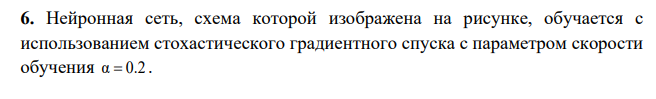

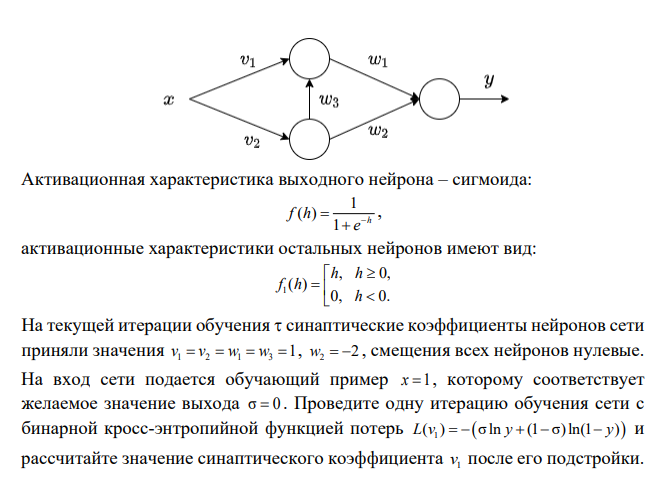



Заданы синаптические коэффициенты:
$$ 
v_1 = v_2 = w_1 = w_3 = 1, w_2 = -2 
$$
Смещения всех нейронов равны нулю. На вход подается значение x = 1, желаемое значение выхода sigma = 0.

## 1) Выходы нейронов первого слоя y_1 и y_2

Сначала вычислим активации скрытых нейронов y_1 и y_2:

$$
y_1 = x \cdot v_1 + y_2 \cdot w_3
$$

$$
y_2 = x \cdot v_2
$$

Подставим значения v_1 = 1, v_2 = 1, w_3 = 1:

$$
y_2 = 1 \cdot 1 = 1
$$

$$
y_1 = 1 \cdot 1 + 1 \cdot 1 = 1 + 1 = 2
$$

## 2) Вычисление выхода сети y

Потенциал нейрона h вычисляется как:

$$
h = y_1 \cdot w_1 + y_2 \cdot w_2
$$

Подставляем значения w_1 = 1 и w_2 = -2:

$$
h = 2 \cdot 1 + 1 \cdot (-2) = 2 - 2 = 0
$$

Теперь применим сигмоидальную функцию активации:

$$
y = \frac{1}{1 + e^{-h}} = \frac{1}{1 + e^0} = \frac{1}{2} = 0.5
$$

## 3) Вычисление функции потерь L

Функция потерь задается как:

$$
L = -[\sigma \ln(y) + (1 - \sigma) \ln(1 - y)]
$$

Подставляем sigma = 0 (желаемое значение выхода):

$$
L = -\ln(1 - y) = -\ln(1 - 0.5) = -\ln(0.5) = \ln(2) \approx 0.693
$$

## 4) Вычисление градиента функции потерь по y

Градиент функции потерь по y вычисляется как:

$$
\frac{\partial L}{\partial y} = -\frac{\sigma}{y} + \frac{1 - \sigma}{1 - y}
$$

Подставляем sigma = 0:

$$
\frac{\partial L}{\partial y} = \frac{1}{1 - y} = \frac{1}{1 - 0.5} = 2
$$

## 5) Градиент по входу h 

Градиент выхода по входу h (сигмоидальная функция активации) равен:

$$
\frac{\partial y}{\partial h} = y \cdot (1 - y) = 0.5 \cdot (1 - 0.5) = 0.25
$$

## 6) Градиент по v_1

Поскольку $$ h = y_1 \cdot w_1 + y_2 \cdot w_2 $$ Вычислим градиент по v_1:

$$
\frac{\partial h}{\partial v_1} = x
$$

Градиент функции потерь по v_1  вычисляется как:

$$
\frac{\partial L}{\partial v_1} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h} \cdot \frac{\partial h}{\partial v_1}
$$

Подставляем значения:

$$
\frac{\partial L}{\partial v_1} = 2 \cdot 0.25 \cdot 1 = 0.5
$$

## 7) Обновление значения v_1 

Используем скорость обучения alpha = 0.2:

$$
v_1^{\text{новое}} = v_1^{\text{старое}} - \alpha \cdot \frac{\partial L}{\partial v_1}
$$

Подставляем значения:

$$
v_1^{\text{новое}} = 1 - 0.2 \cdot 0.5 = 1 - 0.1 = 0.9
$$

## Ответ: v_1 = 0.9.


In [7]:

import numpy as np

# Параметры сети
v1 = 1
v2 = 1
w1 = 1
w2 = -2
w3 = 1
alpha = 0.2
sigma = 0
x = 1

# Функция активации (сигмоида)
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

# Функция потерь 
def loss(y, sigma):
    return - (sigma * np.log(y) + (1 - sigma) * np.log(1 - y))

# Вычисляем значения y1 и y2
y2 = x * v2
y1 = x * v1 + y2 * w3

# Вычисляем выход сети y
h = y1 * w1 + y2 * w2
y = sigmoid(h)

# Вычисляем градиент функции потерь по y
dL_dy = 1 / (1 - y)

# Вычисляем градиент y по h
dy_dh = y * (1 - y)

# Градиент функции потерь по v1
dL_dv1 = dL_dy * dy_dh * x

# Обновляем значение v1
v1_new = v1 - alpha * dL_dv1

print(f"Новое значение v1: {v1_new}")


Новое значение v1: 0.9


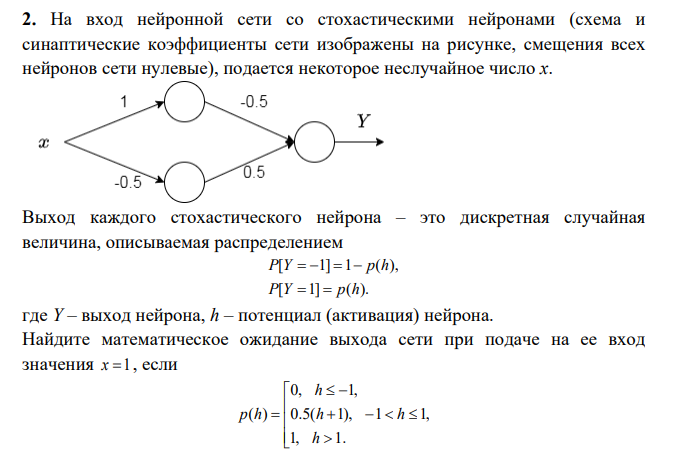



## 1) Вычисление активаций нейронов

1. Для первого нейрона:

$$
h_1 = x \cdot 1 = 1 \cdot 1 = 1
$$

2. Для второго нейрона:

$$
h_2 = x \cdot (-0.5) = 1 \cdot (-0.5) = -0.5
$$

3. Для выходного нейрона:

$$
h_3 = h_1 \cdot (-0.5) + h_2 \cdot 0.5 = 1 \cdot (-0.5) + (-0.5) \cdot 0.5 = -0.5 - 0.25 = -0.75
$$

## 2) Вероятности выхода нейронов

Теперь применим функцию активации p(h) для каждого нейрона.

1. Для первого нейрона h_1 = 1:

$$
p(h_1) = 1 \quad \text{(поскольку \(h_1 = 1\))}
$$

P(Y_1 = 1) = 1 и P(Y_1 = -1) = 0.

2. Для второго нейрона h_2 = -0.5:

$$
p(h_2) = 0.5 \cdot (-0.5 + 1) = 0.5 \cdot 0.5 = 0.25
$$

P(Y_2 = 1) = 0.25 и P(Y_2 = -1) = 0.75.

3. Для выходного нейрона h_3 = -0.75:

$$
p(h_3) = 0.5 \cdot (-0.75 + 1) = 0.5 \cdot 0.25 = 0.125
$$

P(Y_3 = 1) = 0.125 и P(Y_3 = -1) = 0.875.

## 3) Математическое ожидание выхода сети

Теперь найдём математическое ожидание выхода сети. Для этого воспользуемся формулой:

$$
\mathbb{E}[Y] = 2p(h)-1
$$

1. Для первого нейрона:

$$
\mathbb{E}[Y_1] = 2*1-1 = 1
$$

2. Для второго нейрона:

$$
\mathbb{E}[Y_2] = 2*0.25-1 = -0.5
$$

3. Для выходного нейрона:

$$
\mathbb{E}[Y_3] = 2*0.125-1 = -0.75
$$

### Ответ: Математическое ожидание выхода сети = -0.75.


In [2]:
import numpy as np

# Параметры сети
v1 = 1
v2 = -0.5
w1 = -0.5
w2 = 0.5
x = 1

# Функция для вычисления вероятности p(h)
def p_h(h):
    if h <= -1:
        return 0
    elif -1 < h <= 1:
        return 0.5 * (h + 1)
    else:
        return 1

# Функция для вычисления математического ожидания E[Y]
def expectation(p_h):
    return 2 * p_h - 1

# Вычисляем активации нейронов
h1 = x * v1
h2 = x * v2
h3 = h1 * w1 + h2 * w2

# Вычисляем вероятность p(h) для выходного нейрона
p_h3 = p_h(h3)

# Вычисляем математическое ожидание выхода
E_Y3 = expectation(p_h3)

print(f"Математическое ожидание выхода сети: {E_Y3:.4f}")


Математическое ожидание выхода сети: -0.7500


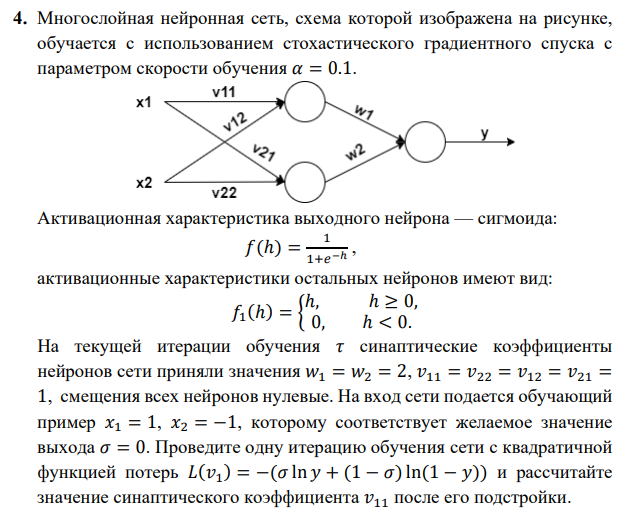


# 1) Вычисление активаций скрытых нейронов

$$
y_1 = x_1 \cdot V_{11} + x_2 \cdot V_{12} = 1 \cdot 1 + (-1) \cdot 1 = 0
$$

$$
y_2 = x_1 \cdot V_{21} + x_2 \cdot V_{22} = 1 \cdot 1 + (-1) \cdot 1 = 0
$$

# 2) Вычисление выхода сети

На выходной нейрон поступают значения y_1 и y_2, а веса выходного слоя заданы как $$W_1 = W_2 = 2$$. Потенциал выхода сети вычисляется как:

$$
h = y_1 \cdot W_1 + y_2 \cdot W_2 = 0 \cdot 2 + 0 \cdot 2 = 0
$$

Далее мы применяем сигмоидальную функцию активации для вычисления выхода:

$$
y = \frac{1}{1 + e^{-h}} = \frac{1}{1 + e^{0}} = 0.5
$$

# 3) Вычисление функции потерь

Функция потерь задается как:

$$
L = -[\sigma \cdot \ln(y) + (1 - \sigma) \cdot \ln(1 - y)]
$$

Подставляем $$sigma = 0$$ (желаемое значение выхода):

$$
L = -\ln(1 - y) = -\ln(1 - 0.5) = -\ln(0.5) = \ln(2) \approx 0.693
$$

# 4) Вычисление градиента функции потерь по y

Градиент функции потерь по y вычисляется как:

$$
\frac{\partial L}{\partial y} = -\frac{\sigma}{y} + \frac{1 - \sigma}{1 - y}
$$

Подставляем $$sigma = 0$$:

$$
\frac{\partial L}{\partial y} = \frac{1}{1 - y} = \frac{1}{1 - 0.5} = 2
$$

# 5) Градиент по h

Градиент выхода по входу h (сигмоидальная функция активации) равен:

$$
\frac{\partial y}{\partial h} = y \cdot (1 - y) = 0.5 \cdot (1 - 0.5) = 0.25
$$

# 6) Градиент по V_11

Поскольку $$h = y_1 \cdot W_1 + y_2 \cdot W_2$$, вычисляем градиент по V_11:

$$
\frac{\partial h}{\partial V_{11}} = x_1
$$

Градиент функции потерь по V_11 вычисляется как:

$$
\frac{\partial L}{\partial V_{11}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h} \cdot \frac{\partial h}{\partial V_{11}}
$$

Подставляем значения:

$$
\frac{\partial L}{\partial V_{11}} = 2 \cdot 0.25 \cdot 1 = 0.5
$$

# 7) Обновление весов

Используем скорость обучения alpha = 0.1 для обновления значения V_11:

$$
V_{11}^{\text{новое}} = V_1^{\text{старое}} - \alpha \cdot \frac{\partial L}{\partial V_1}
$$

$$
V_{11}^{\text{новое}} = 1 - 0.1 \cdot 0.5 = 1 - 0.1 = 0.95
$$

Таким образом,  V_11 = 0.95.




In [22]:
import numpy as np

# Параметры сети
W1 = W2 = 2
V11 = V12 = V21 = V22 = 1
alpha = 0.1
x1 = 1
x2 = -1
sigma = 0  # желаемое значение выхода

# Функция активации (сигмоида)
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

# Квадратичная функция потерь
def loss(y, sigma):
    return -(sigma * np.log(y) + (1 - sigma) * np.log(1 - y))

# Вычисляем значения скрытых нейронов
y1 = x1 * V11 + x2 * V12
y2 = x1 * V21 + x2 * V22

# Вычисляем выход сети
h = y1 * W1 + y2 * W2
y = sigmoid(h)

# Градиент функции потерь по y
dL_dy = 1 / (1 - y)

# Градиент выхода по h
dy_dh = y * (1 - y)

# Градиент функции потерь по h
dL_dh = dL_dy * dy_dh

# Градиент по V11
dL_dV11 = dL_dh * x1

# Обновляем значение V11
V11_new = V11 - alpha * dL_dV11

print(f"Новое значение V11: {V11_new}")


Новое значение V11: 0.95
